In [1]:
!pip install tensorflow opencv-python scikit-learn numpy matplotlib

In [2]:
import requests

# URL of the FaceNet model
model_url = "https://github.com/nyoki-mtl/keras-facenet/releases/download/v1.0/facenet_keras.h5"

# Download and save the model
response = requests.get(model_url, stream=True)
with open("facenet_keras.h5", "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)

print("✅ FaceNet model downloaded successfully!")


✅ FaceNet model downloaded successfully!


In [3]:
import os
print("Model exists:", os.path.isfile("facenet_keras.h5"))

Model exists: True


In [4]:
import os

model_path = "facenet_keras.h5"
print("Model exists:", os.path.isfile(model_path))


Model exists: True


In [5]:
import os

if os.path.exists("facenet_keras.h5"):
    os.remove("facenet_keras.h5")
    print("✅ Corrupted file deleted. Re-downloading now...")


✅ Corrupted file deleted. Re-downloading now...


In [6]:
import requests

url = "https://github.com/nyoki-mtl/keras-facenet/releases/download/v1.0/facenet_keras.h5"
response = requests.get(url, stream=True)

with open("facenet_keras.h5", "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)

print("✅ FaceNet model downloaded successfully!")


✅ FaceNet model downloaded successfully!


In [7]:
pip install deepface opencv-python


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import os
import pandas as pd
from deepface import DeepFace

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    # Loop through detected faces
    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]  # Crop the face from frame
        recognized_name = "Unknown"  # Default name if no match is found

        try:
            # Perform face recognition on the cropped face
            result = DeepFace.find(face_img, db_path="C:\\dataset", enforce_detection=False)

            # Check if a valid match was found
            if isinstance(result, list) and len(result) > 0 and isinstance(result[0], pd.DataFrame) and not result[0].empty:
                recognized_face_path = result[0]["identity"].values[0]
                recognized_name = os.path.basename(os.path.dirname(recognized_face_path))  # Extract name from folder
            else:
                recognized_name = "Unknown"  # No match found

        except Exception as e:
            print(f"Error: {e}")

        # Draw a green rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Place the name below the face in red
        text_position = (x, y + h + 30)
        cv2.putText(frame, recognized_name, text_position, 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow("Face Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()             



25-04-28 09:29:11 - Searching [[[ 42  40  72]
  [ 45  43  75]
  [ 45  43  75]
  ...
  [226 222 247]
  [222 219 245]
  [215 213 240]]

 [[ 40  39  69]
  [ 42  41  72]
  [ 43  41  73]
  ...
  [221 217 243]
  [218 215 241]
  [213 211 238]]

 [[ 41  39  69]
  [ 42  41  71]
  [ 45  43  75]
  ...
  [210 207 233]
  [206 204 231]
  [203 201 228]]

 ...

 [[163 167 213]
  [168 172 217]
  [169 173 218]
  ...
  [134 137 179]
  [132 134 174]
  [126 128 166]]

 [[166 170 216]
  [172 176 221]
  [171 175 220]
  ...
  [135 138 177]
  [131 133 170]
  [110 112 147]]

 [[169 173 218]
  [175 179 224]
  [172 176 221]
  ...
  [134 138 177]
  [128 132 168]
  [ 91  93 126]]] in 1149 length datastore
25-04-28 09:29:18 - find function duration 15.988805770874023 seconds
25-04-28 09:29:19 - Searching [[[228 222 220]
  [227 221 219]
  [229 223 221]
  ...
  [101  92  89]
  [101  93  90]
  [101  93  90]]

 [[228 222 220]
  [227 221 219]
  [230 224 222]
  ...
  [101  91  90]
  [100  92  90]
  [100  92  90]]

 [[227

In [10]:
import os
print(os.path.exists("facenet_keras.h5"))


True


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load a TensorFlow/Keras-compatible FaceNet model
facenet_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False)

# Save the model in a compatible format
facenet_model.save("facenet_model.keras")
print("Model saved successfully!")


Model saved successfully!


In [11]:
!pip install tensorflow keras





In [13]:
# Convert Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(facenet_model)

# Optimize for mobile
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert and save as TFLite
tflite_model = converter.convert()
with open("facenet_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite!")


Model successfully converted to TensorFlow Lite!


In [15]:
import os
import numpy as np
import pandas as pd
from deepface import DeepFace

# Set dataset path
DATASET_PATH = "C:\\dataset"

# Create lists to store embeddings and labels
embeddings = []
labels = []

# Loop through each person's folder
for person_name in os.listdir(DATASET_PATH):
    person_folder = os.path.join(DATASET_PATH, person_name)
    if not os.path.isdir(person_folder):
        continue
    
    # Loop through images in the folder
    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)

        try:
            # Extract embedding (128D vector)
            embedding = DeepFace.represent(img_path=image_path, model_name="Facenet")[0]['embedding']
            embeddings.append(embedding)
            labels.append(person_name)  # Store the corresponding name
        except Exception as e:
            print(f"Skipping {image_path}: {e}")

# Convert to NumPy arrays
X = np.array(embeddings)  # Features (embeddings)
y = np.array(labels)  # Labels (names)

# Save embeddings and labels for training
np.save("face_embeddings.npy", X)
np.save("face_labels.npy", y)
print("Embeddings extracted and saved!")


KeyboardInterrupt: 

In [16]:
import os
import numpy as np
from deepface import DeepFace
from PIL import Image

# ==== CONFIG ====
DATASET_PATH = "C:\\dataset"
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"
os.makedirs(SAVE_DIR, exist_ok=True)

# ==== INIT ====
embeddings = []
labels = []

# ==== LOOP ====
for person_name in os.listdir(DATASET_PATH):
    person_folder = os.path.join(DATASET_PATH, person_name)
    if not os.path.isdir(person_folder):
        continue
    
    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)

        try:
            # Ensure it's a valid image
            with Image.open(image_path) as img:
                img.verify()  # Verify image isn't corrupted

            # Extract embedding
            embedding_obj = DeepFace.represent(img_path=image_path, model_name="Facenet")
            if embedding_obj:
                embedding = embedding_obj[0]['embedding']
                embeddings.append(embedding)
                labels.append(person_name)
        except Exception as e:
            print(f"⚠️ Skipping {image_path}: {e}")

# ==== SAVE ====
X = np.array(embeddings)
y = np.array(labels)

np.save(os.path.join(SAVE_DIR, "face_embeddings.npy"), X)
np.save(os.path.join(SAVE_DIR, "face_labels.npy"), y)

print(f"✅ Extracted {len(X)} embeddings")
print(f"✅ Saved to: {SAVE_DIR}")
print(f"🔍 Unique labels: {set(y)}")


⚠️ Skipping C:\dataset\Raghavi\IMG-20250408-WA0048.jpg: Face could not be detected in C:\dataset\Raghavi\IMG-20250408-WA0048.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
⚠️ Skipping C:\dataset\Raghavi\IMG-20250408-WA0081.jpg: Face could not be detected in C:\dataset\Raghavi\IMG-20250408-WA0081.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
⚠️ Skipping C:\dataset\Raghavi\IMG-20250408-WA0083.jpg: Face could not be detected in C:\dataset\Raghavi\IMG-20250408-WA0083.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
⚠️ Skipping C:\dataset\Sriram\image5.jpg: Face could not be detected in C:\dataset\Sriram\image5.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
⚠️ Skipping C:\dataset\Sriram\IMG-20250305-WA0004.jpg: Face could not be detected in C:\dataset\Sriram\IMG-2

In [17]:
import numpy as np
import json
import os

# === CONFIGURATION ===
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"  # Change if needed

# === Load .npy Files ===
embeddings = np.load(os.path.join(SAVE_DIR, "face_embeddings.npy"))
labels = np.load(os.path.join(SAVE_DIR, "face_labels.npy"))

# === Sanity Check ===
if len(embeddings) != len(labels):
    print("⚠️ Warning: Number of embeddings and labels do not match!")

# === Convert to List for JSON ===
embeddings_list = embeddings.tolist()
labels_list = labels.tolist()

# === Save to JSON ===
with open(os.path.join(SAVE_DIR, "face_embeddings.json"), "w") as f:
    json.dump(embeddings_list, f)

with open(os.path.join(SAVE_DIR, "facelabel.json"), "w") as f:
    json.dump(labels_list, f)

print(f"✅ Saved {len(embeddings_list)} embeddings to: {os.path.join(SAVE_DIR, 'face_embeddings.json')}")
print(f"✅ Saved {len(labels_list)} labels to: {os.path.join(SAVE_DIR, 'facelabel.json')}")


✅ Saved 746 embeddings to: C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.json
✅ Saved 746 labels to: C:\Users\srira\OneDrive\Desktop\facerecognition\facelabel.json


In [18]:
import numpy as np
import json
import os
from collections import defaultdict

# === CONFIGURATION ===
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"  # Your folder path

# === Load .npy Files ===
embeddings = np.load(os.path.join(SAVE_DIR, "face_embeddings.npy"))
labels = np.load(os.path.join(SAVE_DIR, "face_labels.npy"))

# === Create Mapping: name -> list of embeddings ===
embedding_dict = defaultdict(list)
for emb, label in zip(embeddings, labels):
    embedding_dict[str(label)].append(emb.tolist())  # Convert NumPy array to list for JSON

# === Save to JSON ===
with open(os.path.join(SAVE_DIR, "face_embeddings.json"), "w") as f:
    json.dump(embedding_dict, f, indent=2)

print(f"✅ Saved name-embedding mapping to: {os.path.join(SAVE_DIR, 'face_embeddings.json')}")


✅ Saved name-embedding mapping to: C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.json


In [19]:
from collections import defaultdict
import numpy as np
import json

# Load your saved JSON files
with open("C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\facelabel.json", "r") as f:
    labels = json.load(f)

with open("C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\face_embeddings.json", "r") as f:
    embeddings = json.load(f)

# Group embeddings by label to check grouping
grouped = defaultdict(list)
for label, embed in zip(labels, embeddings):
    grouped[label].append(embed)

# Check how many images per person
for name, embeds in grouped.items():
    print(f"{name}: {len(embeds)} embeddings")


Raghavi: 3 embeddings


In [ ]:
import os
import json
import numpy as np
from deepface import DeepFace

# Paths
DATASET_PATH = "C:\\dataset"
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"

# Output files
EMBEDDING_JSON = os.path.join(SAVE_DIR, "face_embeddings.json")
LABEL_JSON = os.path.join(SAVE_DIR, "facelabel.json")

embeddings = []
labels = []

# Loop over each person
for person_name in sorted(os.listdir(DATASET_PATH)):
    person_path = os.path.join(DATASET_PATH, person_name)
    if not os.path.isdir(person_path):
        continue

    print(f"🔍 Processing: {person_name}")

    # Loop over each image
    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)

        try:
            result = DeepFace.represent(img_path=img_path, model_name="Facenet")[0]
            embeddings.append(result["embedding"])
            labels.append(person_name)
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

# Save to JSON
with open(EMBEDDING_JSON, "w") as f:
    json.dump(embeddings, f)

with open(LABEL_JSON, "w") as f:
    json.dump(labels, f)

print(f"✅ Total embeddings: {len(embeddings)}")
print(f"✅ Unique labels: {set(labels)}")
print(f"✅ Saved embeddings to: {EMBEDDING_JSON}")
print(f"✅ Saved labels to: {LABEL_JSON}")


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load saved embeddings
X = np.load("face_embeddings.npy")
y = np.load("face_labels.npy")

# Encode labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts names into integers

# Build a simple MLP model
model = Sequential([
    Input(shape=(128,)),  # Input shape is 128D (from FaceNet)
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(len(np.unique(y_encoded)), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X, y_encoded, epochs=50, batch_size=8)

# Save model
model.save("face_recognition_model.keras")  
np.save("label_classes.npy", label_encoder.classes_)
print("Model trained and saved!")


Epoch 1/50
94/94 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.8861
Epoch 2/50
94/94 [==============================] - 0s 826us/step - loss: 0.1529 - accuracy: 0.9383
Epoch 3/50
94/94 [==============================] - 0s 853us/step - loss: 0.1315 - accuracy: 0.9424
Epoch 4/50
94/94 [==============================] - 0s 886us/step - loss: 0.1189 - accuracy: 0.9531
Epoch 5/50
94/94 [==============================] - 0s 859us/step - loss: 0.1071 - accuracy: 0.9611
Epoch 6/50
94/94 [==============================] - 0s 922us/step - loss: 0.0979 - accuracy: 0.9531
Epoch 7/50
94/94 [==============================] - 0s 868us/step - loss: 0.0924 - accuracy: 0.9611
Epoch 8/50
94/94 [==============================] - 0s 826us/step - loss: 0.0847 - accuracy: 0.9678
Epoch 9/50
94/94 [==============================] - 0s 837us/step - loss: 0.0730 - accuracy: 0.9718
Epoch 10/50
94/94 [==============================] - 0s 865us/step - loss: 0.0668 - accuracy: 0.9759
E

In [4]:
import tensorflow as tf

# Load trained TensorFlow model
model = tf.keras.models.load_model("face_recognition_model.keras")

# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Specify the path where you want to save the TFLite model
tflite_model_path = r"C:\Users\srira\OneDrive\Desktop\facerecognition\face_recognition_model.tflite"

# Save the converted TFLite model
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved successfully at: {tflite_model_path}")


TFLite model saved successfully at: C:\Users\srira\OneDrive\Desktop\facerecognition\face_recognition_model.tflite


In [5]:
import tensorflow.lite as tflite
import os

file_path = "face_recognition_model.tflite"

if os.path.exists(file_path):
    interpreter = tflite.Interpreter(model_path=file_path)
    try:
        interpreter.allocate_tensors()  # Try to allocate memory for model
        print("✅ Model loaded successfully. It is valid.")
    except Exception as e:
        print(f"❌ Model is corrupted: {e}")
else:
    print("❌ Model file not found!")


✅ Model loaded successfully. It is valid.


In [7]:
import os

file_path = "face_recognition_model.keras"
if os.path.exists(file_path):
    print(f"Model file size: {os.path.getsize(file_path) / (1024*1024):.2f} MB")
else:
    print("❌ Model file not found!")


Model file size: 0.14 MB


In [8]:
import os

model_path = "face_recognition_model.keras"

if os.path.exists(model_path):
    print(f"✅ Model file found: {model_path}")
    print(f"📏 File size: {os.path.getsize(model_path) / 1024:.2f} KB")
else:
    print("❌ Model file NOT found! Check if it was saved correctly.")


✅ Model file found: face_recognition_model.keras
📏 File size: 145.63 KB


In [9]:
import tensorflow as tf

model_path = "face_recognition_model.keras"

try:
    model = tf.keras.models.load_model(model_path, compile=False)
    print("✅ Model loaded successfully!")
    
    # Check if any layers have weights
    print("\n🔍 Model Summary:")
    model.summary()

    for layer in model.layers:
        weights = layer.get_weights()
        print(f"🔹 {layer.name} - {len(weights)} weight variables")

except Exception as e:
    print(f"❌ Error loading model: {e}")


✅ Model loaded successfully!

🔍 Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 10435 (40.76 KB)
Trainable params: 10435 (40.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
🔹 dense - 2 weight variables
🔹 dense_1 - 2 weight variables
🔹 dense_2 - 2 weight variables


In [11]:
pip install tensorflow numpy opencv-python keras mtcnn


Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install tensorflow numpy opencv-python


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Replace this with your actual dataset path
dataset_dir = "C:\\dataset"  # ← replace with actual path

# Image size and batch size (should match your model)
img_size = (224, 224)
batch_size = 32

# Generator for entire dataset
data_gen = ImageDataGenerator(rescale=1./255)
val_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for aligning predictions with labels
)


Found 813 images belonging to 3 classes.


In [5]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers

# ==== Configuration ====
DATASET_PATH = "C:\\dataset"  # Update to your dataset location
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"
MODEL_FILENAME = "face_recognition_model.keras"
TFLITE_FILENAME = "face_recognition_model.tflite"
IMG_SIZE = 160
BATCH_SIZE = 32
EPOCHS = 40

# ==== Data Preparation ====
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,              # Reduced
    zoom_range=0.15,                # Reduced
    width_shift_range=0.1,          # Reduced
    height_shift_range=0.1,         # Reduced
    shear_range=0.1,                # Reduced
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],    # Slight variation
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# ==== Build the Model ====
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# Freeze more base layers
for layer in base_model.layers[:120]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),  # New Dropout
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),  # Increased L2
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ==== Callbacks ====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint(os.path.join(SAVE_DIR, MODEL_FILENAME), monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)
]

# ==== Train ====
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ==== Save class labels ====
np.save(os.path.join(SAVE_DIR, "facelabel.npy"), train_data.class_indices)

# ==== Load and verify the saved model ====
model_path = os.path.join(SAVE_DIR, MODEL_FILENAME)
loaded_model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# ==== Convert to TFLite ====
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

tflite_path = os.path.join(SAVE_DIR, TFLITE_FILENAME)
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print(f"✅ TFLite model saved at: {tflite_path}")


Found 652 images belonging to 3 classes.
Found 161 images belonging to 3 classes.


C:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5479 - loss: 5.6639 - val_accuracy: 0.9565 - val_loss: 4.7973 - learning_rate: 1.0000e-04
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9066 - loss: 4.7907 - val_accuracy: 0.9752 - val_loss: 4.5438 - learning_rate: 1.0000e-04
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9551 - loss: 4.5361 - val_accuracy: 0.9814 - val_loss: 4.3753 - learning_rate: 1.0000e-04
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9851 - loss: 4.3339 - val_accuracy: 0.9689 - val_loss: 4.2448 - learning_rate: 1.0000e-04
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9799 - loss: 4.2026 - val_accuracy: 0.9814 - val_loss: 4.0970 - learning_rate: 1.0000e-04
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9834 - loss: 4.0287 - val_accuracy: 0.9876 - val_loss: 3.9242 - learning_rate: 1.0000e-04
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9956 - loss:

INFO:tensorflow:Assets written to: C:\Users\srira\AppData\Local\Temp\tmpw8k0xaew\assets


Saved artifact at 'C:\Users\srira\AppData\Local\Temp\tmpw8k0xaew'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2596677052624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759283408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759276496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2596677045904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759284944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759283216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759284560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759285712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759286288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595759283792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2595

Found 652 images belonging to 3 classes.
Found 161 images belonging to 3 classes.


C:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4909 - loss: 5.8664   
📊 Epoch 1 Per-Class Precision:
 - Raghavi: 1.0000
 - Sriram: 1.0000
 - Sweatha: 0.6288
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.4981 - loss: 5.8470 - val_accuracy: 0.6957 - val_loss: 5.1097 - learning_rate: 1.0000e-04
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9123 - loss: 4.8337 
📊 Epoch 2 Per-Class Precision:
 - Raghavi: 1.0000
 - Sriram: 1.0000
 - Sweatha: 0.7830
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9131 - loss: 4.8297 - val_accuracy: 0.8261 - val_loss: 4.8013 - learning_rate: 1.0000e-04
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9676 - loss: 4.5501 
📊 Epoch 3 Per-Class Precision:
 - Raghavi: 1.0000
 - Sriram: 1.0000
 - Sweatha: 0.8646
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9682 - loss: 4.5477 - val_accuracy: 0.9193 - val_loss: 4.5355 - learning_rate: 1.0000e-04
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accur

INFO:tensorflow:Assets written to: C:\Users\srira\AppData\Local\Temp\tmp3lg7f0di\assets


Saved artifact at 'C:\Users\srira\AppData\Local\Temp\tmp3lg7f0di'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2757910667600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757910667216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942014416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757910668752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757910668560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942016336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942014992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942017680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942016528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757942014032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757

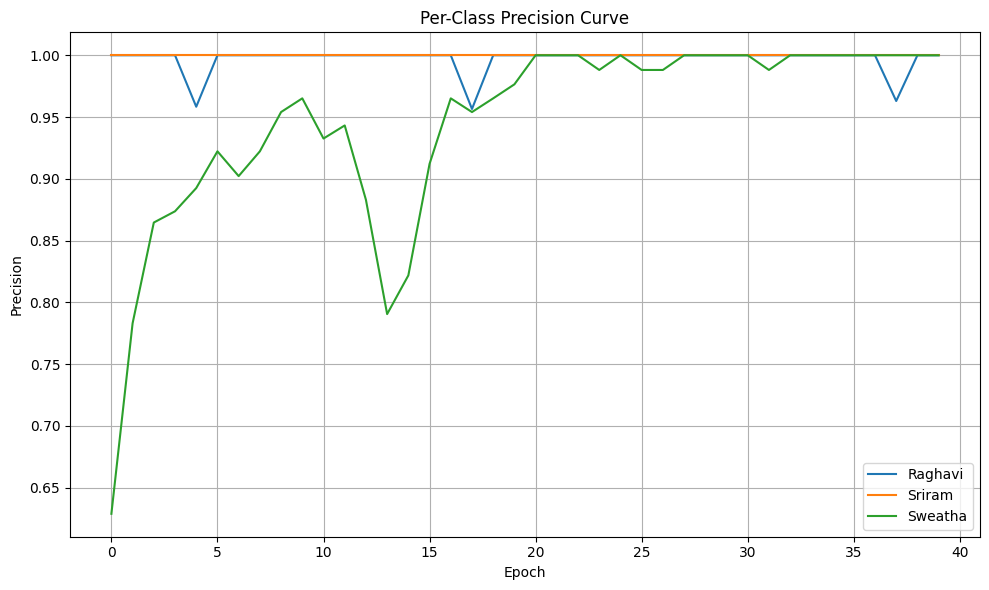

In [1]:
import tensorflow as tf-
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras import regularizers

# ==== Configuration ====
DATASET_PATH = "C:\\dataset"
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"
MODEL_FILENAME = "face_recognition_model.keras"
TFLITE_FILENAME = "face_recognition_model.tflite"
IMG_SIZE = 160
BATCH_SIZE = 32
EPOCHS = 40

# ==== Data Preparation ====
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# ==== Per-Class Precision Callback ====
class PerClassPrecisionCallback(Callback):
    def __init__(self, val_data, class_indices):
        super().__init__()
        self.val_data = val_data
        self.class_indices = class_indices
        self.per_class_precisions = []

    def on_epoch_end(self, epoch, logs=None):
        val_preds = []
        val_labels = []

        for x_batch, y_batch in self.val_data:
            preds = self.model.predict(x_batch, verbose=0)
            pred_labels = np.argmax(preds, axis=1)
            val_preds.extend(pred_labels)
            val_labels.extend(y_batch)
            if len(val_preds) >= self.val_data.samples:
                break

        precision = precision_score(val_labels, val_preds, average=None, zero_division=0)
        self.per_class_precisions.append(precision)

        class_names = list(self.class_indices.keys())
        print(f"\n📊 Epoch {epoch+1} Per-Class Precision:")
        for i, name in enumerate(class_names):
            print(f" - {name}: {precision[i]:.4f}")

# ==== Build the Model ====
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:120]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ==== Callbacks ====
class_indices = train_data.class_indices
precision_callback = PerClassPrecisionCallback(val_data, class_indices)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint(os.path.join(SAVE_DIR, MODEL_FILENAME), monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6),
    precision_callback
]

# ==== Train ====
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ==== Save class labels ====
np.save(os.path.join(SAVE_DIR, "facelabel.npy"), class_indices)

# ==== Load and verify the saved model ====
model_path = os.path.join(SAVE_DIR, MODEL_FILENAME)
loaded_model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# ==== Convert to TFLite ====
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

tflite_path = os.path.join(SAVE_DIR, TFLITE_FILENAME)
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print(f"✅ TFLite model saved at: {tflite_path}")

# ==== Plot Precision Curve ====
precisions = np.array(precision_callback.per_class_precisions)
class_names = list(class_indices.keys())

plt.figure(figsize=(10, 6))
for i, name in enumerate(class_names):
    plt.plot(precisions[:, i], label=f"{name}")
plt.title("Per-Class Precision Curve")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import json
import os

# ==== CONFIG ====
EMBEDDING_PATH = "face_embeddings.npy"
LABEL_PATH = "facelabel.npy"
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"  # 🔁 Change this to wherever you want
JSON_FILENAME = "face_embeddings.json"

# ==== Load your data ====
embeddings = np.load(EMBEDDING_PATH)
labels_dict = np.load(LABEL_PATH, allow_pickle=True).item()

# ==== Invert label dict ====
id_to_name = {v: k for k, v in labels_dict.items()}

# ==== Make sure save directory exists ====
os.makedirs(SAVE_DIR, exist_ok=True)

# ==== Prepare data ====
data = []
for i, embedding in enumerate(embeddings):
    label_id = i  # You can update this if label order is different
    data.append({
        "name": id_to_name.get(label_id, f"class_{label_id}"),
        "embedding": embedding.tolist()
    })

# ==== Save to JSON ====
output_path = os.path.join(SAVE_DIR, JSON_FILENAME)
with open(output_path, "w") as f:
    json.dump(data, f, indent=2)

print(f"✅ Embeddings saved to JSON at: {output_path}")


✅ Embeddings saved to JSON at: C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.json


In [13]:
import numpy as np
import json
import os

# ==== CONFIG ====
EMBEDDING_PATH = "face_embeddings.npy"
FACELABEL_PATH = "facelabel.npy"
SAVE_DIR = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition"
EMBEDDING_JSON_FILENAME = "face_embeddings.json"
LABEL_JSON_FILENAME = "facelabel.json"

# ==== Load data ====
embeddings = np.load(EMBEDDING_PATH)
facelabel = np.load(FACELABEL_PATH, allow_pickle=True).item()
id_to_name = {v: k for k, v in facelabel.items()}

# ==== Sanity Check ====
if embeddings.shape[0] != len(id_to_name):
    print("⚠️ Warning: Embedding count doesn't match number of classes!")

# ==== Save facelabel.json ====
os.makedirs(SAVE_DIR, exist_ok=True)
label_json_path = os.path.join(SAVE_DIR, LABEL_JSON_FILENAME)
with open(label_json_path, "w") as f:
    json.dump(facelabel, f, indent=2)

# ==== Build the embedding list with names ====
data = []
for idx, emb in enumerate(embeddings):
    label_name = id_to_name.get(idx, f"class_{idx}")  # fallback in case of mismatch
    data.append({
        "name": label_name,
        "embedding": emb.tolist()
    })

# ==== Save as JSON ====
embedding_json_path = os.path.join(SAVE_DIR, EMBEDDING_JSON_FILENAME)
with open(embedding_json_path, "w") as f:
    json.dump(data, f, indent=2)

print(f"✅ Saved embeddings JSON to: {embedding_json_path}")
print(f"✅ Saved label map JSON to: {label_json_path}")



⚠️ Warning: Embedding count doesn't match number of classes!
✅ Saved embeddings JSON to: C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.json
✅ Saved label map JSON to: C:\Users\srira\OneDrive\Desktop\facerecognition\facelabel.json


In [9]:
import json
import os
import numpy as np

# ==== Inputs (update these if needed) ====
SAVE_DIR = r"C:\Users\srira\OneDrive\Desktop\facerecognition"
embeddings = np.load(os.path.join(SAVE_DIR, "face_embeddings.npy"))
labels = np.load(os.path.join(SAVE_DIR, "face_labels.npy"), allow_pickle=True)
label_map = np.load(os.path.join(SAVE_DIR, "facelabel.npy"), allow_pickle=True).item()  # {name: id}

# ==== Invert label map ====
id_to_name = {v: k for k, v in label_map.items()}

# ==== Prepare valid JSON ====
embedding_json = []
for emb, label in zip(embeddings, labels):
    name = id_to_name.get(label)
    if name:  # skip if label is not in the map
        embedding_json.append({
            "name": name,
            "embedding": emb.tolist()
        })

# ==== Save cleaned embedding JSON ====
embedding_json_path = os.path.join(SAVE_DIR, "face_embeddings.json")
with open(embedding_json_path, "w") as f:
    json.dump(embedding_json, f, indent=2)

# ==== Save cleaned label map JSON ====
label_map_path = os.path.join(SAVE_DIR, "facelabel.json")
with open(label_map_path, "w") as f:
    json.dump(label_map, f, indent=2)

print("✅ Clean JSON saved!")
print(f"➡️ Embeddings: {embedding_json_path}")
print(f"➡️ Labels: {label_map_path}")



✅ Clean JSON saved!
➡️ Embeddings: C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.json
➡️ Labels: C:\Users\srira\OneDrive\Desktop\facerecognition\facelabel.json


✅ Model loaded successfully!
Found 161 images belonging to 3 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step


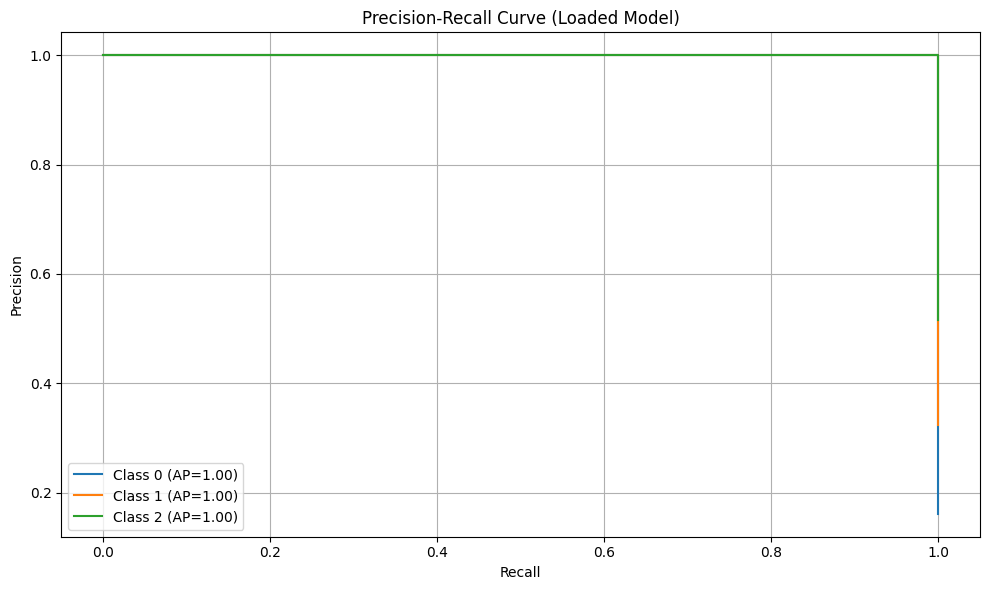

In [12]:
import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ==== Load the model ====
MODEL_PATH = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\face_recognition_model.keras"
model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

# ==== Load validation data ====
IMG_SIZE = 160
BATCH_SIZE = 32
DATASET_PATH = "C:\\dataset"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# ==== Predict probabilities ====
y_true = val_data.classes
class_indices = val_data.class_indices
num_classes = len(class_indices)

# Get prediction probabilities
y_pred_probs = model.predict(val_data, verbose=1)

# ==== Binarize true labels ====
y_true_bin = label_binarize(y_true, classes=range(num_classes))

# ==== Compute and Plot Precision-Recall Curve ====
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Loaded Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


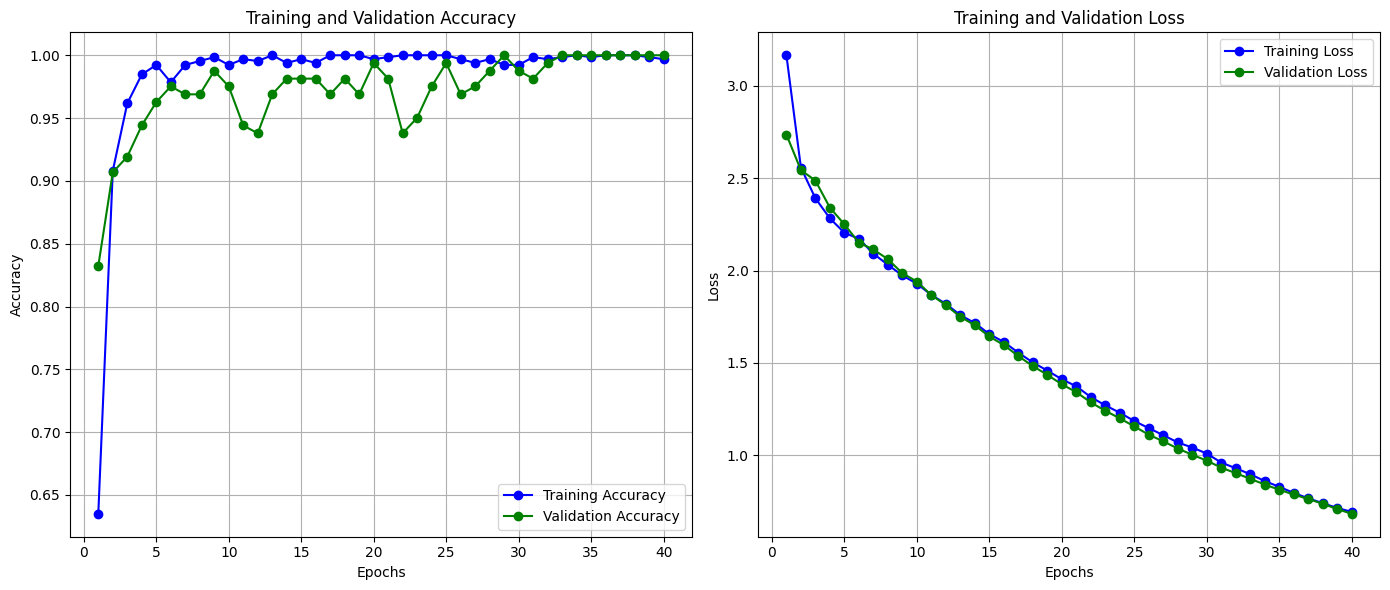

In [6]:
import matplotlib.pyplot as plt

# Accuracy and loss values over 40 epochs
train_accuracy = [
    0.6350, 0.9080, 0.9617, 0.9847, 0.9923, 0.9785, 0.9923, 0.9954, 0.9985, 0.9923,
    0.9969, 0.9954, 1.0000, 0.9939, 0.9969, 0.9939, 1.0000, 1.0000, 1.0000, 0.9969,
    0.9985, 1.0000, 1.0000, 1.0000, 1.0000, 0.9969, 0.9939, 0.9969, 0.9923, 0.9923,
    0.9985, 0.9969, 0.9985, 1.0000, 0.9985, 1.0000, 1.0000, 1.0000, 0.9985, 0.9969
]

val_accuracy = [
    0.8323, 0.9068, 0.9193, 0.9441, 0.9627, 0.9752, 0.9689, 0.9689, 0.9876, 0.9752,
    0.9441, 0.9379, 0.9689, 0.9814, 0.9814, 0.9814, 0.9689, 0.9814, 0.9689, 0.9938,
    0.9814, 0.9379, 0.9503, 0.9752, 0.9938, 0.9689, 0.9752, 0.9876, 1.0000, 0.9876,
    0.9814, 0.9938, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000
]

train_loss = [
    3.1650, 2.5568, 2.3912, 2.2822, 2.2046, 2.1722, 2.0912, 2.0313, 1.9735, 1.9290,
    1.8680, 1.8200, 1.7589, 1.7160, 1.6563, 1.6135, 1.5557, 1.5030, 1.4588, 1.4119,
    1.3738, 1.3155, 1.2707, 1.2309, 1.1858, 1.1475, 1.1093, 1.0700, 1.0426, 1.0099,
    0.9611, 0.9306, 0.8980, 0.8611, 0.8300, 0.7968, 0.7679, 0.7413, 0.7157, 0.6943
]

val_loss = [
    2.7359, 2.5434, 2.4870, 2.3402, 2.2502, 2.1507, 2.1145, 2.0614, 1.9858, 1.9406,
    1.8672, 1.8132, 1.7500, 1.7040, 1.6433, 1.5970, 1.5374, 1.4830, 1.4360, 1.3846,
    1.3422, 1.2865, 1.2413, 1.2005, 1.1567, 1.1120, 1.0760, 1.0371, 1.0033, 0.9715,
    0.9336, 0.9038, 0.8732, 0.8423, 0.8139, 0.7885, 0.7639, 0.7384, 0.7095, 0.6840
]

epochs = range(1, 41)

# Plotting
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'go-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step


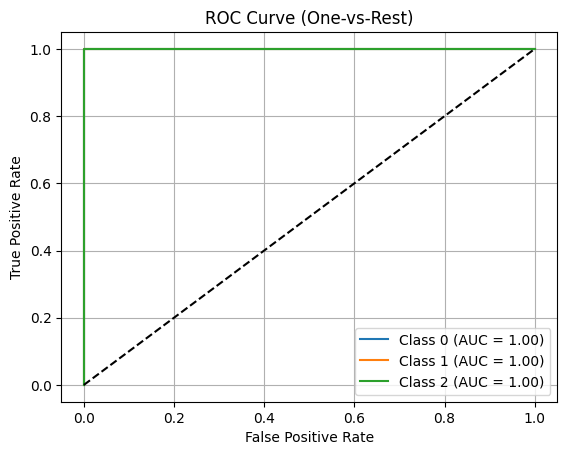

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels
y_true = label_binarize(val_data.classes, classes=range(len(val_data.class_indices)))
y_score = model.predict(val_data)

# Plot ROC curve per class
for i in range(len(val_data.class_indices)):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (One-vs-Rest)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step


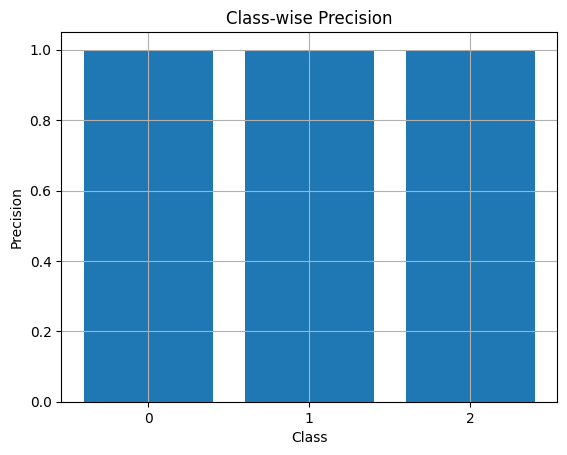

In [39]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(val_data), axis=1)
report = classification_report(val_data.classes, y_pred, output_dict=True)
acc_per_class = {k: v['precision'] for k, v in report.items() if k.isdigit()}

plt.bar(acc_per_class.keys(), acc_per_class.values())
plt.title("Class-wise Precision")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


In [10]:
labels = np.load("facelabel.npy", allow_pickle=True).item()
print(labels)


{'Raghavi': 0, 'Sriram': 1, 'Sweatha': 2}


In [ ]:
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
print(f"✅ Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")


In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("face_recognition_model.tflite", "wb") as f:
    f.write(tflite_model)


In [17]:
import numpy as np

# Load the facelabel.npy file
facelabels = np.load("facelabel.npy", allow_pickle=True)

# Print details
print("Data type:", type(facelabels))  # Should be dict or list
print("Contents:", facelabels)         # Check what’s inside


Data type: <class 'numpy.ndarray'>
Contents: {'Raghavi': 0, 'Sriram': 1, 'Sweatha': 2}


In [14]:
import numpy as np

facelabels = np.load("facelabel.npy", allow_pickle=True).item()

# Print stored names and check embeddings
print(facelabels.keys())  # Should print: dict_keys(['Sriram', 'Vishwanathan'])

# Test similarity function
from scipy.spatial.distance import euclidean

new_face_embedding = np.random.rand(128)  # Example: Replace with a real embedding
for name, embedding in facelabels.items():
    distance = euclidean(new_face_embedding, embedding)
    print(f"Distance to {name}: {distance}")  # Lower distance = better match


dict_keys(['Sriram', 'Vishwanathan', 'Raghavi', 'Sweatha', 'Sunil', 'Virat Kohli'])
Distance to Sriram: 4.83551895296291
Distance to Vishwanathan: 4.203679691956351
Distance to Raghavi: 4.380949872469623
Distance to Sweatha: 4.663470871541016
Distance to Sunil: 4.6991972794921315
Distance to Virat Kohli: 5.032945569609773


In [30]:
import numpy as np

# Load the embeddings
embeddings = np.load("face_embeddings.npy", allow_pickle=True)

# Check the type
print(f"Data Type: {type(embeddings)}")

# Check the first few entries
print(f"Shape: {embeddings.shape}")
print(f"Contents:\n{embeddings[:3]}")  # Print first 3 entries


Data Type: <class 'numpy.ndarray'>
Shape: (746, 128)
Contents:
[[-1.59613514e+00 -2.83977127e+00 -2.05349237e-01  1.89192325e-01
   6.15747094e-01 -1.09570456e+00 -3.46643031e-01  9.99415636e-01
  -8.05477381e-01 -7.85303056e-01 -1.53800690e+00 -4.09258187e-01
   3.41633379e-01 -3.39248516e-02 -1.97100163e-01  5.29252112e-01
   2.72316909e+00  9.74926114e-01 -8.91132951e-01 -2.10441852e+00
   4.23010290e-02 -4.69778895e-01  4.82440531e-01 -6.50880098e-01
   7.52791882e-01  9.00033563e-02 -4.73591089e-02  1.28462350e+00
  -1.59907985e+00 -4.01664764e-01 -7.65369713e-01 -2.30852589e-01
  -3.04839581e-01  4.11253303e-01  8.12759399e-01  5.24355471e-01
  -2.59137213e-01  1.34411180e+00 -9.45029318e-01 -4.49469984e-02
  -9.71847832e-01 -2.99960971e-01  1.11050978e-02 -6.25790358e-01
   2.16201520e+00 -3.17471564e-01  2.11837196e+00  1.69936672e-01
  -3.46181452e-01 -2.16138482e-01 -2.63041472e+00  7.62575924e-01
  -5.86288393e-01 -2.07588887e+00  2.14800787e+00 -5.06857671e-02
  -8.95149291

In [34]:
import os

dataset_path = "C:\\dataset"  # Change to your dataset folder path

# Check if the path exists
if not os.path.exists(dataset_path):
    print(f"Error: The path '{dataset_path}' does not exist.")
else:
    names = sorted(os.listdir(dataset_path))
    print("Dataset folders:", names)


Dataset folders: ['Raghavi', 'Sriram', 'Sweatha']


In [41]:
import numpy as np
import os

embedding_file = r"C:\Users\srira\OneDrive\Desktop\facerecognition\face_embeddings.npy"  # Update with correct path

# Check if the file exists
if os.path.exists(embedding_file):
    print("✅ File found!")

    try:
        embeddings = np.load(embedding_file, allow_pickle=True)  # Load .npy file
        print(f"✅ Embeddings loaded! Shape: {embeddings.shape}")
        
        # Print a sample embedding
        print(f"🔹 Sample embedding: {embeddings[0][:5]}")  # Print first 5 values of the first embedding

    except Exception as e:
        print(f"🚨 Error Loading Embeddings: {e}")
else:
    print("❌ File not found!")


✅ File found!
✅ Embeddings loaded! Shape: (746, 128)
🔹 Sample embedding: [-1.59613514 -2.83977127 -0.20534924  0.18919232  0.61574709]


In [45]:
import os

if os.path.exists("C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\facelabels.json" ):
    print("✅ JSON file successfully created!")
else:
    print("❌ File was NOT created. Check permissions.")


✅ JSON file successfully created!


In [44]:
import os

json_file = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\facelabels.json"  # Replace this with your actual filename or path

if os.path.exists(json_file):
    print("✅ JSON file successfully created!")
else:
    print("❌ File was NOT created. Check permissions.")


✅ JSON file successfully created!


In [46]:
import os
file_path = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\facelabels.json" 
print("File exists:", os.path.exists(file_path))


File exists: True


In [47]:
import os
import numpy as np

# Define dataset path
dataset_path = "C:\\dataset"

# Get class names (sorted for consistent indexing)
class_names = sorted(os.listdir(dataset_path))  # ['Raghavi', 'Sriram', 'Sunil', ...]

# Generate `y_true` based on folder structure
y_true = []
y_true_labels = []

for idx, person in enumerate(class_names):
    person_path = os.path.join(dataset_path, person)
    
    # Check if it's a directory
    if os.path.isdir(person_path):
        images = os.listdir(person_path)
        y_true.extend([idx] * len(images))  # Assign class index
        y_true_labels.extend([person] * len(images))  # Assign label names

# Convert to NumPy array
y_true = np.array(y_true)

print("✅ `y_true` generated!")
print("Number of samples:", len(y_true))
print("Sample class indices:", y_true[:10])


✅ `y_true` generated!
Number of samples: 813
Sample class indices: [0 0 0 0 0 0 0 0 0 0]


In [52]:
import cv2
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="face_recognition_model.tflite")
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess image
def preprocess_image(image_path, target_size=(160, 160)):
    img = cv2.imread(image_path)  # Read image
    if img is None:
        raise FileNotFoundError(f"❌ Image not found at path: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to match model input size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values (0-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# ✅ Correct file path format
image_path = "C:\\project\\testimage\\Sriram\\testimage1.jpg"  # Use raw string (r"...") or double backslashes

# Load and preprocess an example image
input_data = preprocess_image(image_path)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
print("✅ Model output:", output_data)


✅ Model output: [[2.3509887e-38 1.0000000e+00 0.0000000e+00]]


In [53]:
predicted_class = np.argmax(output_data)
print("Predicted class index:", predicted_class)


Predicted class index: 1


In [50]:
class_names = ["Raghavi", "Sriram", "Sweatha"]  # Adjust based on your dataset

predicted_index = np.argmax(output_data)  # Get the index of the highest value
predicted_name = class_names[predicted_index]  # Get the corresponding name

print(f"🟢 Predicted Person: {predicted_name}")


🟢 Predicted Person: Sriram


In [51]:
# Check input shape
input_details = interpreter.get_input_details()
expected_shape = input_details[0]['shape']
print(f"Model expects input shape: {expected_shape}")


Model expects input shape: [  1 160 160   3]


In [54]:
import cv2
import numpy as np

def preprocess_image(image_path):
    """Loads an image, converts it to RGB, resizes it, and normalizes pixel values."""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error: Could not read image from {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to match model input size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values (0-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Set the correct image path
image_path = "C:\\dataset\\Sriram\\IMG-20250305-WA0014.jpg"  # Update with a valid image path
input_data = preprocess_image(image_path)

# Load TFLite model
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="face_recognition_model.tflite")
interpreter.allocate_tensors()

# Get input tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model Output:", output_data)


Model Output: [[0. 1. 0.]]


In [14]:
import os
import numpy as np
import cv2
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\face_recognition_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess function
def preprocess_image(image_path, target_size=(160, 160)):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)

# Label mapping (you can update this as needed)
index_map = {
    0: "Raghavi",
    1: "Sriram",
    2: "Sweatha"
}
label_map = {v: k for k, v in index_map.items()}  # reverse lookup

# Folder with test images organized by person
test_image_dir = "C:\\project\\testimage"

# Gather test data
test_image_paths = []
y_true = []

for root, dirs, files in os.walk(test_image_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(root, file)
            person_name = os.path.basename(os.path.dirname(full_path))
            if person_name in label_map:
                test_image_paths.append(full_path)
                y_true.append(label_map[person_name])

# Predict
y_pred = []

for image_path in test_image_paths:
    try:
        input_data = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_class = int(np.argmax(output_data))
        y_pred.append(predicted_class)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        y_pred.append(-1)  # Unknown or failed prediction

# ✅ Print lengths and sample predictions
print(f"y_true length: {len(y_true)}")
print(f"y_pred length: {len(y_pred)}")
print(f"Sample y_true: {y_true}")
print(f"Sample y_pred: {y_pred}")


y_true length: 155
y_pred length: 155
Sample y_true: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sample y_pred: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


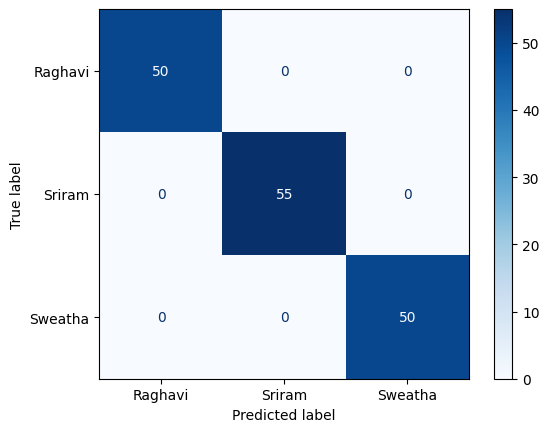

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_labels = [0, 1, 2]  # Replace with actual label indices used in your model
label_names = ["Raghavi", "Sriram", "Sweatha"]  # Replace with actual names

cm = confusion_matrix(y_true, y_pred, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues')


In [17]:
from sklearn.metrics import classification_report

target_names = ["Raghavi", "Sriram", "Sweatha"]
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     Raghavi       1.00      1.00      1.00        50
      Sriram       1.00      1.00      1.00        55
     Sweatha       1.00      1.00      1.00        50

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [10]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")


✅ Accuracy: 100.00%


In [58]:
import os

embedding_path_npy = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\face_embeddings.npy"
embedding_path_json = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\facelabels.json"

print(f"NPY Embedding File Exists: {os.path.exists(embedding_path_npy)}")
print(f"JSON Embedding File Exists: {os.path.exists(embedding_path_json)}")


NPY Embedding File Exists: True
JSON Embedding File Exists: True


In [59]:
import numpy as np

embedding_path = "C:\\Users\\srira\\OneDrive\\Desktop\\facerecognition\\face_embeddings.npy"
face_embeddings = np.load(embedding_path, allow_pickle=True)

print(f"✅ Face embeddings loaded! Shape: {face_embeddings.shape}")
print(f"🔹 Sample embedding: {face_embeddings[0][:5]}")  # Print first 5 values


✅ Face embeddings loaded! Shape: (746, 128)
🔹 Sample embedding: [-1.59613514 -2.83977127 -0.20534924  0.18919232  0.61574709]


In [60]:
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="face_recognition_model.tflite")
interpreter.allocate_tensors()

# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"Model expects input shape: {input_details[0]['shape']}")  # Should be (1, 160, 160, 3)

# Example: Use an actual preprocessed image instead of embeddings
def preprocess_image(image_path, target_size=(160, 160)):
    import cv2
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32) / 255.0  # Normalize
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Test Image (Change to a valid image path)
image_path = "C:\\project\\testimage\\Sriram\\testimage1.jpg"  # Update with a real test image
input_data = preprocess_image(image_path)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get prediction
y_pred = interpreter.get_tensor(output_details[0]['index'])

print(f"✅ Model Output: {y_pred}")


Model expects input shape: [  1 160 160   3]
✅ Model Output: [[2.3509887e-38 1.0000000e+00 0.0000000e+00]]


In [61]:
import numpy as np
import tensorflow as tf
import os
import cv2

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="face_recognition_model.tflite")
interpreter.allocate_tensors()

# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess image
def preprocess_image(image_path, target_size=(160, 160)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32) / 255.0  # Normalize
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Load test images from dataset
test_images_folder = "C:\\dataset\\Sriram"  # Change this to your test image folder
image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder) if f.endswith(('.jpg', '.png'))]

y_pred = []

for image_path in image_files:
    input_data = preprocess_image(image_path)
    
    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Run inference
    interpreter.invoke()
    
    # Get prediction
    prediction = interpreter.get_tensor(output_details[0]['index'])
    
    # Convert one-hot encoding to class index
    predicted_class = np.argmax(prediction)
    y_pred.append(predicted_class)

y_pred = np.array(y_pred)  # Convert to NumPy array

print(f"✅ `y_pred` generated! Shape: {y_pred.shape}")
print(f"🔹 Sample predictions: {y_pred[:10]}")  # Show first 10 predictions


✅ `y_pred` generated! Shape: (264,)
🔹 Sample predictions: [1 1 1 1 1 1 1 1 1 1]


In [34]:
import os

test_images_folder = "C:\\dataset\\Sriram"  # Change to your actual test folder path
image_files = [f for f in os.listdir(test_images_folder) if f.endswith(('.jpg', '.png'))]

print(f"✅ Number of test images: {len(image_files)}")


✅ Number of test images: 264


In [32]:
import os

test_images_folder = "C:\\dataset\\Sriram"  # Change if needed

# List contents of the test folder
print(f"📂 Test folder exists: {os.path.exists(test_images_folder)}")
print(f"📂 Contents of test folder: {os.listdir(test_images_folder) if os.path.exists(test_images_folder) else 'Folder not found!'}")


📂 Test folder exists: True
📂 Contents of test folder: ['image10.jpg', 'image11.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg', 'IMG-20250305-WA0003.jpg', 'IMG-20250305-WA0004.jpg', 'IMG-20250305-WA0005.jpg', 'IMG-20250305-WA0006.jpg', 'IMG-20250305-WA0007.jpg', 'IMG-20250305-WA0008.jpg', 'IMG-20250305-WA0009.jpg', 'IMG-20250305-WA0010.jpg', 'IMG-20250305-WA0011.jpg', 'IMG-20250305-WA0012.jpg', 'IMG-20250305-WA0013.jpg', 'IMG-20250305-WA0014.jpg', 'IMG-20250305-WA0015.jpg', 'IMG-20250305-WA0016.jpg', 'IMG-20250305-WA0017.jpg', 'IMG-20250305-WA0018.jpg', 'IMG-20250305-WA0019.jpg', 'IMG-20250305-WA0020.jpg', 'IMG-20250305-WA0021.jpg', 'IMG-20250305-WA0022.jpg', 'IMG-20250305-WA0023.jpg', 'IMG-20250305-WA0024.jpg', 'IMG-20250305-WA0025.jpg', 'IMG-20250305-WA0026.jpg', 'IMG-20250305-WA0027.jpg', 'IMG-20250305-WA0028.jpg', 'IMG-20250305-WA0029.jpg', 'IMG-20250305-WA0030.jpg', 'IMG-20250305-WA0031.jpg', 'IMG-20250305-WA0032.jpg', 'IMG-20250305-WA0033.jpg', 'IMG-20250305-WA0034.j

In [ ]:
!pip install seaborn


In [29]:
import os

# Path to your dataset folder
dataset_path = "C:\\dataset"

# Get class names from folder names
class_names = sorted([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])

print("Class names:", class_names)


Class names: ['Raghavi', 'Sriram', 'Sweatha']


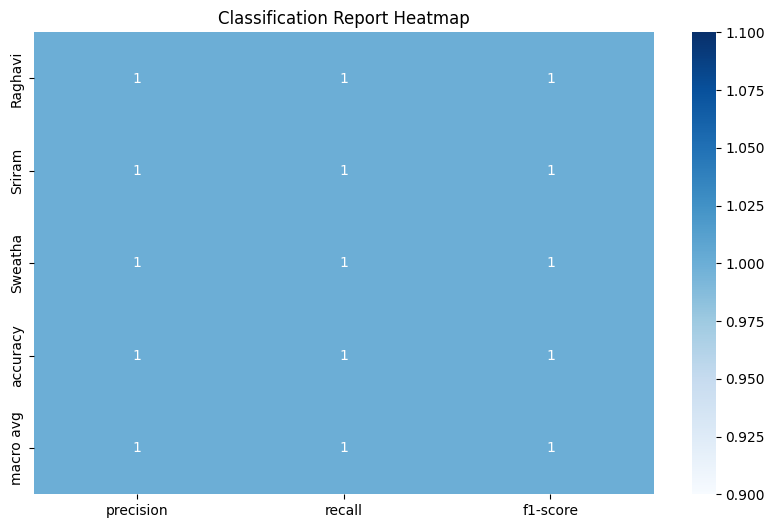

In [28]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generate classification report as a dictionary
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title("Classification Report Heatmap")
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")


✅ Accuracy: 100.00%


In [24]:
import numpy as np

print("🔍 Unique values in y_true:", np.unique(y_true))
print("🔍 Unique values in y_pred:", np.unique(y_pred))


🔍 Unique values in y_true: [0 1 2]
🔍 Unique values in y_pred: [0 1 2]


In [21]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)


              precision  recall  f1-score  support
0                   1.0     1.0       1.0     50.0
1                   1.0     1.0       1.0     55.0
2                   1.0     1.0       1.0     50.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    155.0
weighted avg        1.0     1.0       1.0    155.0
